# Analyzing Customer Behavior with K-Means Clustering

The project focuses on customer segmentation using the KMeans Clustering algorithm. The goal is to divide mall customers into distinct groups based on their demographics and purchasing behavior, using data like age, gender, annual income, and spending score. By identifying these customer segments, businesses can better understand their target audience, enabling the marketing team to develop more effective, personalized strategies aimed at specific groups, ultimately improving customer satisfaction and boosting sales. This project provides insights into who the ideal customers are and how to approach them for optimal results.


###### Data used : 

The dataset, **Mall_Customers**, contains customer information collected through membership cards at a supermarket mall. The dataset includes basic features such as:

- **Customer ID**: A unique identifier for each customer.
- **Age**: The age of the customer.
- **Gender**: The gender of the customer (Male/Female).
- **Annual Income**: The yearly earnings of the customer in thousands of dollars.
- **Spending Score**: A score assigned to customers based on their purchasing behavior and habits.

This dataset is intended for customer segmentation using KMeans clustering to identify potential target customers for personalized marketing strategies.

In [1]:
#import paskages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.cluster import KMeans

### Explore Data

In [2]:
#load data
data = pd.read_csv("data/Mall_Customers.csv")

In [3]:
#head data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#last data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#shape data
data.shape

(200, 5)

In [6]:
#information dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#describe data statistical
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#describe data categorical
data.describe(include="object")

,Gender
count,200
unique,2
top,Female
freq,112


### preprocessing data

##### Transform data

In [9]:
#label encoder
label=LabelEncoder()


In [10]:
#apply LabelEncoder on column Gender
data.Gender=label.fit_transform(data.Gender)

In [11]:
#show data after encoder
data[['Gender']].head()

,Gender
0,1
1,1
2,0
3,0
4,0


##### Scaling Values 

In [12]:
standard=StandardScaler()

will apply for columns data numrical (Age   , Annual Income(k$)  ,   Spending Score (1-100))

In [13]:
data_new=data.copy()

In [14]:
data_new[['Age' ,"Annual Income (k$)" , "Spending Score (1-100)"]]=standard.fit_transform(data_new[['Age' ,"Annual Income (k$)" , "Spending Score (1-100)"]])

In [15]:
#show data after standard
data_new.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


### Modeling K-Means

In [16]:
# Initialize  lists to store inertia values
j = []
clusteren = []

In [17]:
# Loop  numbers of clusters
for i in range(2, 12):
    # Initialize  KMeans 
    model = KMeans(n_clusters=i)
    
    # Train  KMeans model 
    model.fit(data_new)
    
    # Append  inertia (sum of squared distances) to  list 
    j.append(model.inertia_)
    
    # Append  number of clusters 'i' to  list 
    clusteren.append(i)


Text(0, 0.5, 'Error')

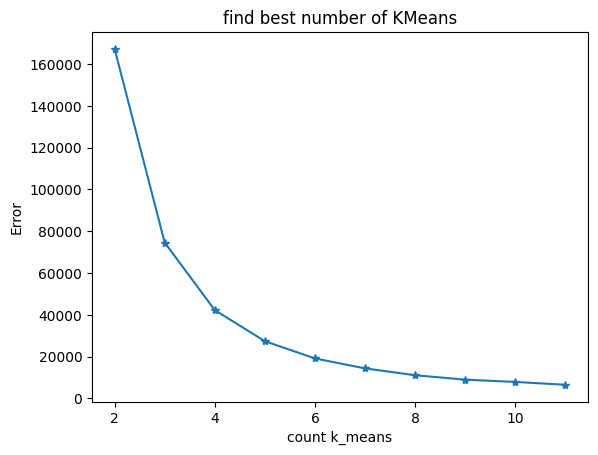

In [18]:
#visualize the "elbow method" to determine the optimal number of clusters
plt.plot(clusteren ,j, marker='*')
plt.title("find best number of KMeans")
plt.xlabel("count k_means")
plt.ylabel("Error")

In [20]:
#KMeans model 
model=KMeans(n_clusters=4)

In [21]:
# train model
model.fit(data)

KMeans(n_clusters=4)

In [22]:
# prediction 
predict =  model.predict(data)

In [23]:
#assign to columns preoict label 
data['predicted_label']=predict

In [24]:
#unique values on label 
data['predicted_label'].unique()

array([0, 2, 3, 1])

In [27]:
# Separating  data based on the predicted labels from KMeans clustering
df0 = data[data['predicted_label'] == 0]  # Data points in cluster 0
df1 = data[data['predicted_label'] == 1]  # Data points in cluster 1
df2 = data[data['predicted_label'] == 2]  # Data points in cluster 2
df3 = data[data['predicted_label'] == 3]  # Data points in cluster 3

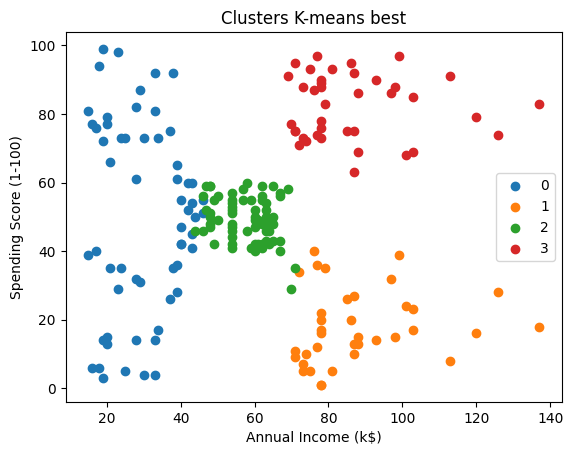

In [28]:
# Plotting the clusters for the KMeans model

plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'], label=0 )
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'] , label=1)
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'] , label=2)
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'] , label=3)
plt.title("Clusters K-means best")
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Data Anlysis

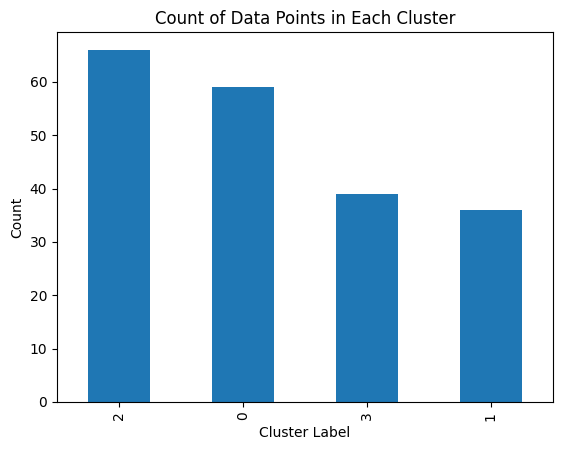

In [30]:
# Plot  count of each cluster label

data['predicted_label'].value_counts().plot(kind='bar')
plt.title("Count of Data Points in Each Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='predicted_label'>

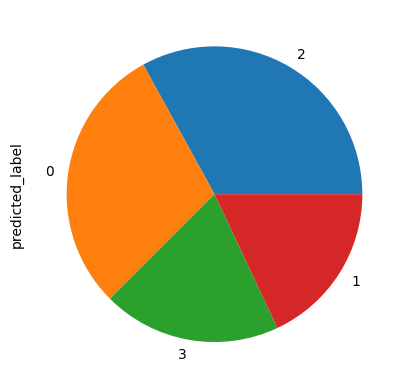

In [31]:
## Plot the count of each cluster label as a pie chart

data['predicted_label'].value_counts().plot(kind='pie')

<Axes: xlabel='predicted_label', ylabel='Spending Score (1-100)'>

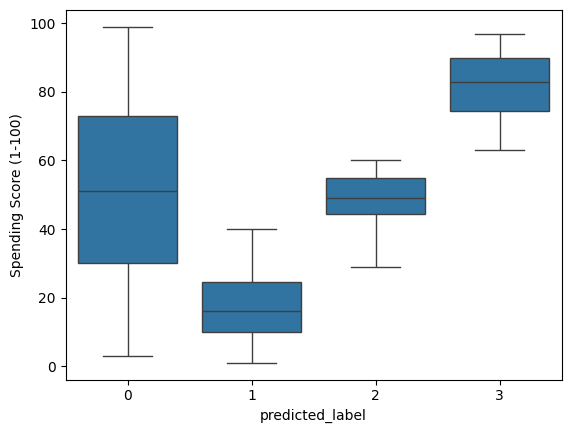

In [38]:
# to visualize the distribution of spending scores across different clusters
sns.boxplot(x='predicted_label', y='Spending Score (1-100)', data=data)

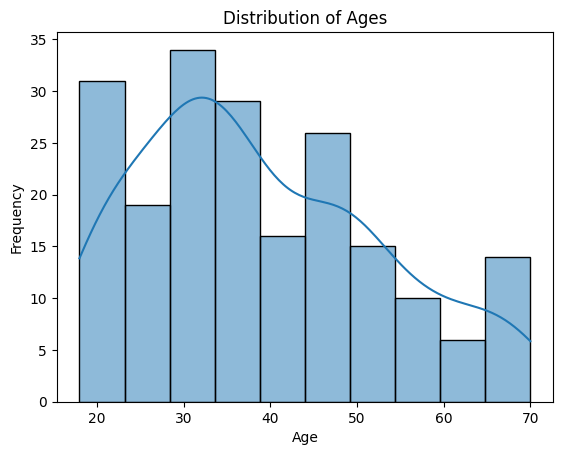

In [40]:
# Plot a histogram to visualize distribution of ages
sns.histplot(data['Age'],bins=10, kde=True)  

plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='predicted_label', ylabel='count'>

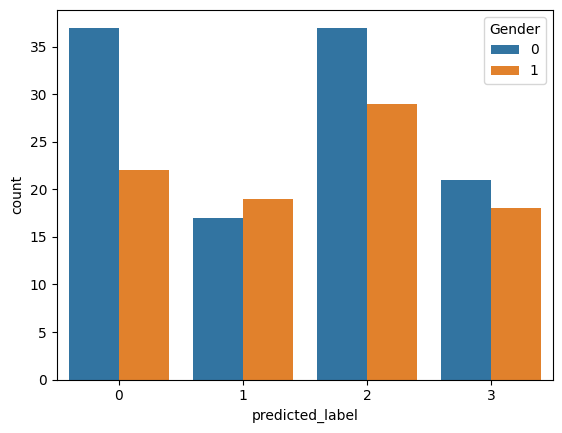

In [43]:
# count plot to visualize counts of predicted labels #gender hue 

sns.countplot(x='predicted_label', hue='Gender', data=data)

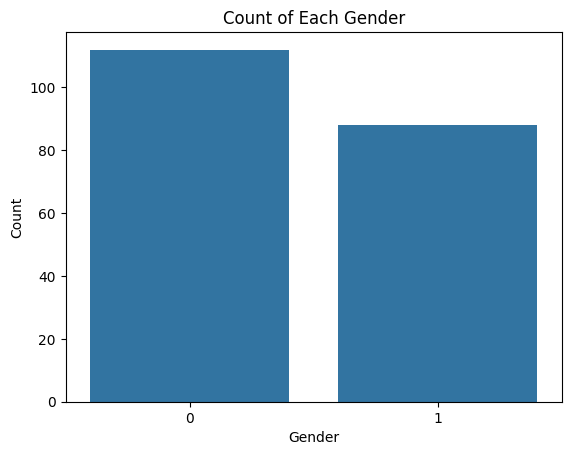

In [46]:
#  to visualize counts gender
sns.countplot(data=data, x='Gender')

plt.title("Count of Each Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

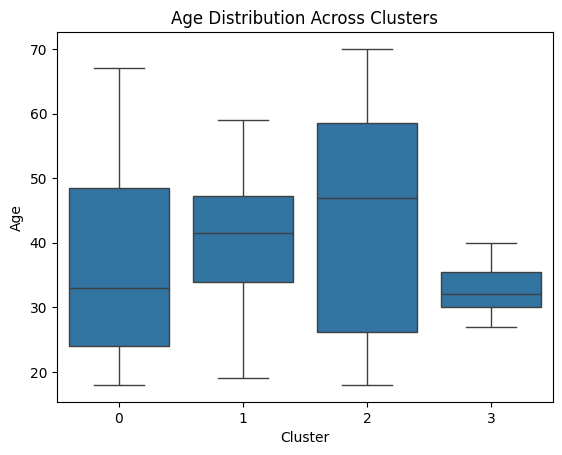

In [51]:
#Visualize how the age distribution varies across clusters
sns.boxplot(x='predicted_label', y='Age', data=data)
plt.title("Age Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()


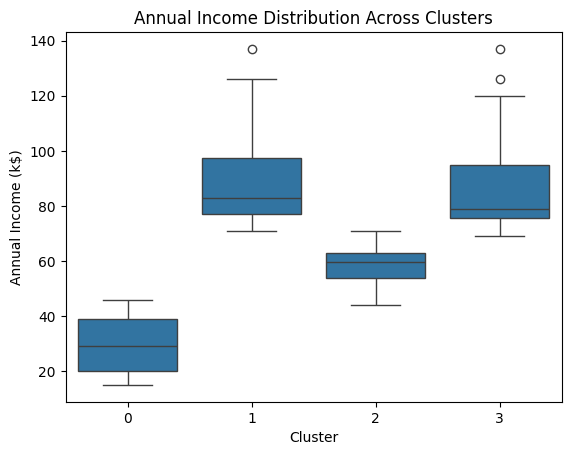

In [52]:
#annual Income Distribution Across Clusters
sns.boxplot(x='predicted_label', y='Annual Income (k$)', data=data)
plt.title("Annual Income Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Annual Income (k$)")
plt.show()


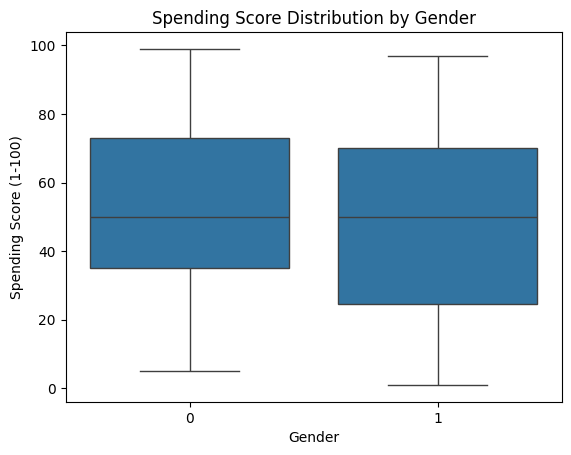

In [64]:
#Analyze how spending score distribution varies by gender.
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title("Spending Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.show()


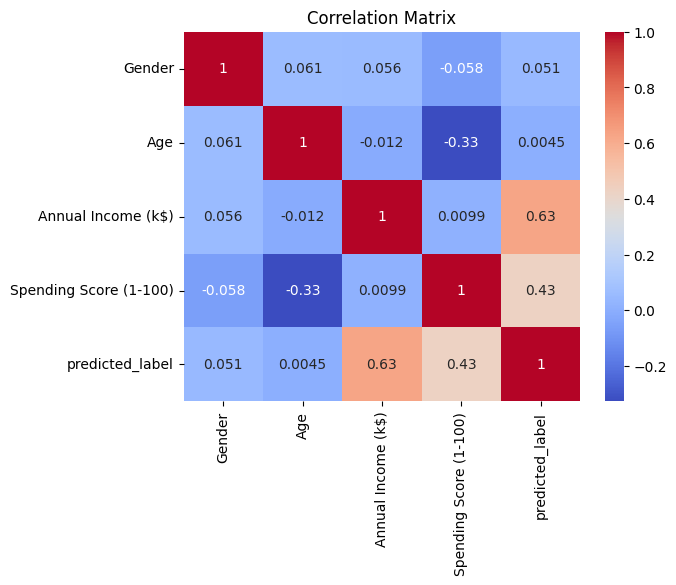

In [63]:
#Correlation Matrix:
corr_matrix = data[["Gender",'Age', 'Annual Income (k$)', 'Spending Score (1-100)',"predicted_label"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


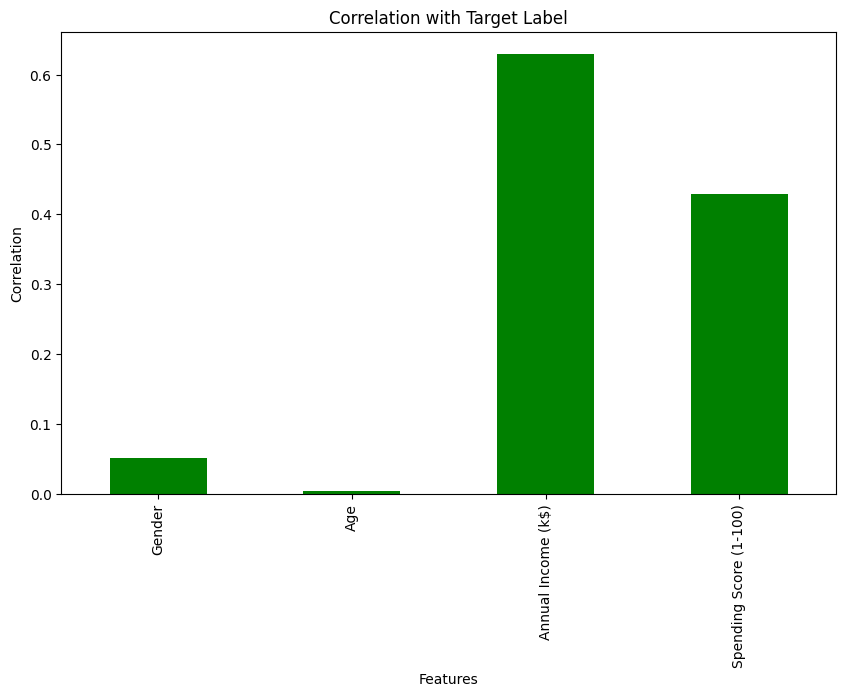

In [70]:
# Extract  correlation of each feature with  target label
target_correlation = corr_matrix['predicted_label'].drop('predicted_label')

# Plot the correlations
plt.figure(figsize=(10, 6))
target_correlation.plot(kind='bar', color='green')
plt.title("Correlation with Target Label")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()
